In [593]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseD = pd.read_csv(mouse_drug_data_to_load)
clinicalTD = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combinedDT = pd.merge(clinicalTD, mouseD, on="Mouse ID")

# Display the data table for preview

combinedDT.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [594]:
#Get the list of medicines being evaluated - including placebo
medicineL = combinedDT["Drug"].unique()
medicineL

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [595]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
dataG1 = combinedDT.groupby(['Drug','Timepoint'])

dataMTV = dataG1['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
MTV_df = pd.DataFrame(dataMTV, columns = ['Tumor Volume (mm3)'])
MTV_df.reset_index(inplace=True)

# # Preview DataFrame
MTV_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [596]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
dataSE = dataG1['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
SE_df = pd.DataFrame(dataSE, columns = ['Tumor Volume (mm3)'])
SE_df.reset_index(inplace=True)

# Preview DataFrame
SE_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [597]:
# Minor Data Munging to Re-Format the Data Frames

G2 = combinedDT.groupby(['Timepoint', 'Drug'])['Tumor Volume (mm3)'].mean().unstack()

# Preview that Reformatting worked
G2


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [598]:
#Standard Error in mean change of Tumor Volume
G3 = combinedDT.groupby(['Timepoint', 'Drug'])['Tumor Volume (mm3)'].sem().unstack()
G3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [599]:
#Variable t includes the days of measurement - from 0 to 45 dayds
t = [x for x in range(0, 50,5)]

#List n includes the index of producs to be displayed in graph
n = [0, 3, 1, 8, 5]

#List of formats to be used for each graph
formats = ['o', 's', "+", "d", '*']
colors = ['red', 'blue', 'black', 'orange', 'purple']

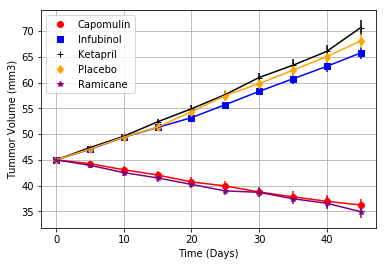

In [600]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
j = 0
#Cycle through list of products, and generate line and errorbar per product
for i in n:
    m1 = G2[medicineL[i]]   #Get the average Tumor size for a medicine
    s1 = G3[medicineL[i]]   #Get the standard error for the average
    ax.plot(t, m1, formats[j], color = colors[j])          #Plot average tumor size vs. days
#    plt.errorbar(t, m1, s1, label=None, fmt = formats[j])  #Present errorbars for each product vs. days
    plt.errorbar(t, m1, s1, label=None, color = colors[j])  #Present errorbars for each product vs. days
    j +=1

plt.grid()
plt.legend(loc="best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tummor Volume (mm3)")
# Save the Figure
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [601]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mG1 = combinedDT.groupby(['Drug','Timepoint'])
dm = mG1['Metastatic Sites'].mean()

# Convert to DataFrame
dfm = pd.DataFrame(dm, columns = ['Metastatic Sites'])

# Preview DataFrame
dfm.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [602]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
dse = mG1['Metastatic Sites'].sem()

# Convert to DataFrame
dfs = pd.DataFrame(dse, columns = ['Metastatic Sites'])

# Preview DataFrame
dfs.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [603]:
# Minor Data Munging to Re-Format the Data Frames - for Sites (Mean)
Gmm = combinedDT.groupby(['Timepoint', 'Drug'])['Metastatic Sites'].mean().unstack()

# Preview that Reformatting worked
Gmm.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [604]:
#Standard Error for sites
Gse = combinedDT.groupby(['Timepoint', 'Drug'])['Metastatic Sites'].sem().unstack()
#Previuw data
Gse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


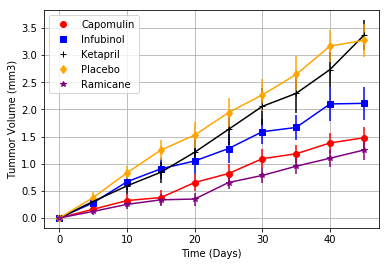

In [605]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

n = [0, 3, 1, 8, 5]
j = 0

#Cycle through list of products (indexes included in n) to generate line and errorbar per product
for i in n:
    m1 = Gmm[medicineL[i]]  #Get average for specific medicine
    s1 = Gse[medicineL[i]]  #Get standard error for specific medicine
    ax.plot(t, m1, formats[j], color = colors[j])          #Plot average vs. time
    plt.errorbar(t, m1, s1, label=None, color = colors[j])  #Plot error var for product
    j += 1

plt.grid()
plt.legend(loc="best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tummor Volume (mm3)")
# Save the Figure

# Show the Figure
plt.show()

## Survival Rates

In [606]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mcG = combinedDT.groupby(['Drug','Timepoint'])
dm = mG1['Mouse ID'].count()
dm.head()
# Convert to DataFrame

mc_df = pd.DataFrame(dm, columns = ['Mouse Count'])

mc_df["Mouse Count"] = dm
mc_df.reset_index(inplace=True)

# Preview DataFrame
mc_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [607]:
# Minor Data Munging to Re-Format the Data Frames
Gm = combinedDT.groupby(['Timepoint', 'Drug'])['Mouse ID'].count().unstack()

# Preview the Data Frame
Gm.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


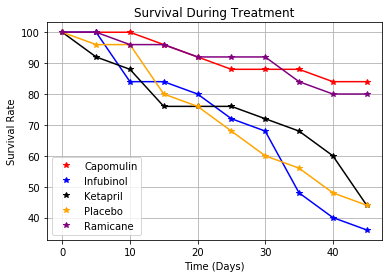

In [608]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()
n = [0, 3, 1, 8, 5]

j=0
#Cycle through list of product to plot
for i in n:
    m1 = Gm[medicineL[i]]
    surv1 = []
    current = m1[0]
    
    #Calculate survival rate for each product, and store values in surv1
    for value in m1:
        if current!=0 :
            surv1.append((value/current)*100)

    #Plot Survival rates for selected products
    ax.plot(t, surv1, '*', label=medicineL[i], color = colors[j])
    ax.plot(t, surv1, color = colors[j])
    j += 1
            
plt.legend(loc="best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate")
plt.title("Survival During Treatment")
plt.grid()

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [609]:
# Calculate the percent changes for each drug

change = []  #List to store the %change for each medicine

#Calculate %change for each medicine
for medicine in medicineL:
    m1 = G2[medicine]                       #Get tumor volume data for medicine
    change.append(((m1[45]/m1[0])-1)*100)   #Calculate %change for medicine and add to list (change)
    
# Display the data to confirm
print (change)

[-19.475302667894155, 57.02879468660604, 53.92334713476919, 46.12347172785185, 52.085134287899, -22.32090046276666, 47.24117486320634, 46.57975086509523, 51.29796048315151, 42.51649185589741]


In [610]:
# Store all Relevant Percent Changes into a Data Frame
changes = pd.DataFrame({"Medicine": medicineL, "Change": change})
changes

,Medicine,Change
0,Capomulin,-19.475303
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Infubinol,46.123472
4,Stelasyn,52.085134
5,Ramicane,-22.320900
6,Propriva,47.241175
7,Zoniferol,46.579751
8,Placebo,51.297960
9,Ceftamin,42.516492


In [611]:
# Splice the data between passing and failing drugs
pass_med = changes.loc[changes['Change'] < 0, :]
# Information of passing medicines
pass_med

,Medicine,Change
0,Capomulin,-19.475303
5,Ramicane,-22.320900


In [612]:
#Information of failing medicines
fail_med = changes.loc[changes['Change'] >= 0, :]
fail_med

,Medicine,Change
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Infubinol,46.123472
4,Stelasyn,52.085134
6,Propriva,47.241175
7,Zoniferol,46.579751
8,Placebo,51.297960
9,Ceftamin,42.516492


In [613]:
#Join passing medicines and failing medicines data to ensure right order for graph
changes2 = pd.concat([pass_med, fail_med])
changes2

,Medicine,Change
0,Capomulin,-19.475303
5,Ramicane,-22.320900
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Infubinol,46.123472
4,Stelasyn,52.085134
6,Propriva,47.241175
7,Zoniferol,46.579751
8,Placebo,51.297960
9,Ceftamin,42.516492


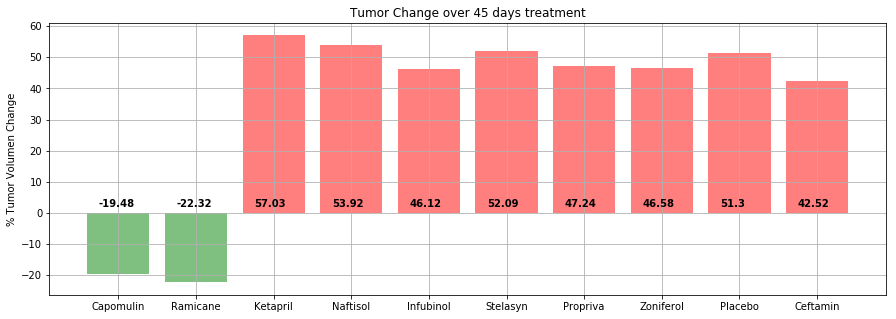

In [614]:
# Orient widths. Add labels, tick marks, etc. 

plt.figure(figsize=(15,5))

i= 0
plt.grid()
plt.bar(pass_med['Medicine'], pass_med["Change"], color = 'green', align='center', alpha=0.5)
plt.bar(fail_med['Medicine'], fail_med["Change"], color = 'red', align='center', alpha=0.5)

#plt.xticks(y_pos, objects)
plt.ylabel('% Tumor Volumen Change')
plt.title('Tumor Change over 45 days treatment')

# Use functions to label the percentages of changes

for v in changes2['Change']:
    plt.text(i-0.25, 2, str(round(v,2)), color='black', fontweight='bold')
    i += 1

# Call functions to implement the function calls


# Save the Figure


# Show the Figure
plt.show()



In [615]:
#Main Conclusions from Analysis
#(1) Capomulin and Remicane are the only two drugs that demonstrated a decrease in Tumor Volume 
#    by day 45 vs. base line, where tumor volume went from 45cm3 to 36.2cm for Capomulin, and 
#    from 45 to 34.9 for Remicane. Other drugs (including placebo) showed increase in Tumor Volume.
#(2) Standard Error analysis suggest that the decrease demonstrated by Capomulin and Remicane 
#    are significantly higher vs. placebo.
#(3) Capomulin and Remicane also demonstrated the highest survival rate for mouses wher 23 of 25 mouses were 
#    still alive by day 45.  Other products had survival rates in line to what placebo demonstrated.
#(4) Capomulin and Remicane were the only two drugs that showed a decrease in Tumor Volume (-19.48% for Capomulin
#    and -22.32% for Remicane.  Other drugs showed increase in Tumor Volume between 42.53% to 57.03%)